<a href="https://colab.research.google.com/github/mvharsh/Deep-Learning/blob/main/Linear_and_Multiple_Regression_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Loading dataset**

In [ ]:
# General data analysis/plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Neural Net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# read in the data and check the data type
df = pd.read_csv('Ann dataset.csv')
df.head()

,Age,Income,Education,Height,Weight,HealthScore
0,25,150,3,65,120,350
1,30,200,4,70,140,450
2,28,180,2,68,130,400
3,35,250,5,75,160,500
4,40,300,6,80,180,550


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          30 non-null     int64
 1   Income       30 non-null     int64
 2   Education    30 non-null     int64
 3   Height       30 non-null     int64
 4   Weight       30 non-null     int64
 5   HealthScore  30 non-null     int64
dtypes: int64(6)
memory usage: 1.5 KB


## **ANN design for Linear Regression**

**Using only Two variables:**

  ***X variable - Age***
  
  ***y variable - HealthScore***

In [ ]:
# our target variable is 'median_house_value'
y = df['HealthScore']
X = df['Age']
print(X.shape, y.shape)

# convert to numpy array
X = np.array(X)
y = np.array(y)

# split into X_train and X_test
# always split into X_train, X_test first THEN apply minmax scaler
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# use minMax scaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train.reshape(-1, 1))
X_test = min_max_scaler.transform(X_test.reshape(-1,1))

# build the model!
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

(30,) (30,)
(24,) (6,) (24,) (6,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              2000      
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 250)               125250    
                                                                 
 dense_3 (Dense)             (None, 1)                 251       
                                                                 
Total params: 628001 (2.40 MB)
Trainable params: 628001 (2.40 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/5000
1/1 [==============================] - 2s 2s/step - loss: 223479.0156 - mae: 465.8209 - val_loss: 197789.8906 - val_mae: 433.0247
Epoch 2/5000
1/1 [==============================] - 0s 93ms/step - loss: 223123.8594 - mae: 465.4668 - val_loss: 197279.0469 - val_mae: 432.5064
Epoch 3/5000
1/1 [==============================] - 0s 71ms/step - loss: 222522.8594 - mae: 464.8617 - val_loss: 196423.1250 - val_mae: 431.6296
Epoch 4/5000
1/1 [==============================] - 0s 74ms/step - loss: 221518.9844 - mae: 463.8448 - val_loss: 195144.0781 - val_mae: 430.3044
Epoch 5/5000
1/1 [==============================] - 0s 64ms/step - loss: 220027.0000 - mae: 462.3232 - val_loss: 193386.5156 - val_mae: 428.4634
Epoch 6/5000
1/1 [==============================] - 0s 60ms/step - loss: 217986.7969 - mae: 460.2276 - val_loss: 191109.3906 - val_mae: 426.0531
Epoch 7/5000
1/1 [==============================] - 0s 73ms/step - loss: 215352.4844 - mae: 457.5008 - val_loss: 188287.7031 - val_m

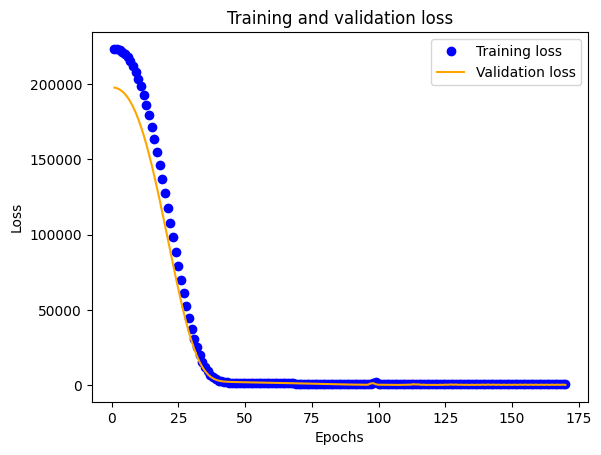

In [ ]:
# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)

# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 20ms/step


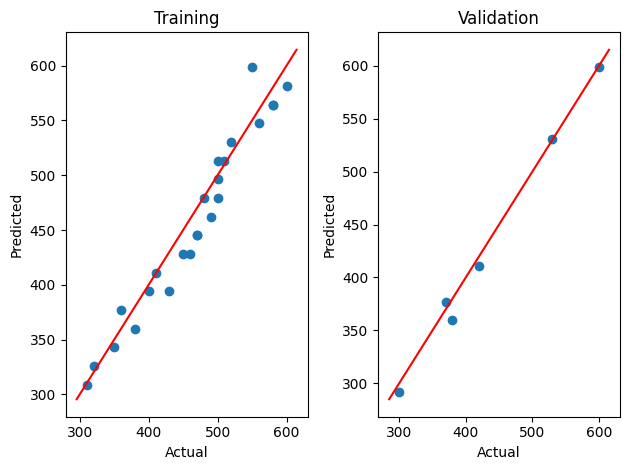

In [ ]:
# scatterplot of actual vs. pred
# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [ ]:
# metrics
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

1/1 [==============================] - 0s 23ms/step
16.172125498453777
7.6519826253255205


## **ANN for Multiple Regression**


**Using multiple variables:**

  ***X variables - Age, Income, Education, Height, Weight***
  
  ***y variable - HealthScore***

In [ ]:
# our target variable is 'median_house_value'
y = df['HealthScore']
X = df.drop('HealthScore', axis=1)
print(X.shape, y.shape)

# convert to numpy array
X = np.array(X)
y = np.array(y)

# split into X_train and X_test
# always split into X_train, X_test first THEN apply minmax scaler
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# use minMax scaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

# build the model!
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

(30, 5) (30,)
(24, 5) (6, 5) (24,) (6,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              6000      
                                                                 
 dense_5 (Dense)             (None, 500)               500500    
                                                                 
 dense_6 (Dense)             (None, 250)               125250    
                                                                 
 dense_7 (Dense)             (None, 1)                 251       
                                                                 
Total params: 632001 (2.41 MB)
Trainable params: 632001 (2.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/5000
1/1 [==============================] - 1s 845ms/step - loss: 223529.7656 - mae: 465.8710 - val_loss: 197501.8594 - val_mae: 432.7400
Epoch 2/5000
1/1 [==============================] - 0s 49ms/step - loss: 222786.8906 - mae: 465.1328 - val_loss: 196298.8125 - val_mae: 431.5377
Epoch 3/5000
1/1 [==============================] - 0s 70ms/step - loss: 221368.8750 - mae: 463.7152 - val_loss: 194107.2344 - val_mae: 429.3311
Epoch 4/5000
1/1 [==============================] - 0s 47ms/step - loss: 218784.8281 - mae: 461.1146 - val_loss: 190589.7500 - val_mae: 425.7511
Epoch 5/5000
1/1 [==============================] - 0s 55ms/step - loss: 214638.7500 - mae: 456.9015 - val_loss: 185519.3906 - val_mae: 420.5134
Epoch 6/5000
1/1 [==============================] - 0s 48ms/step - loss: 208664.5625 - mae: 450.7473 - val_loss: 178767.1406 - val_mae: 413.3985
Epoch 7/5000
1/1 [==============================] - 0s 61ms/step - loss: 200709.0156 - mae: 442.3983 - val_loss: 170310.7656 - va

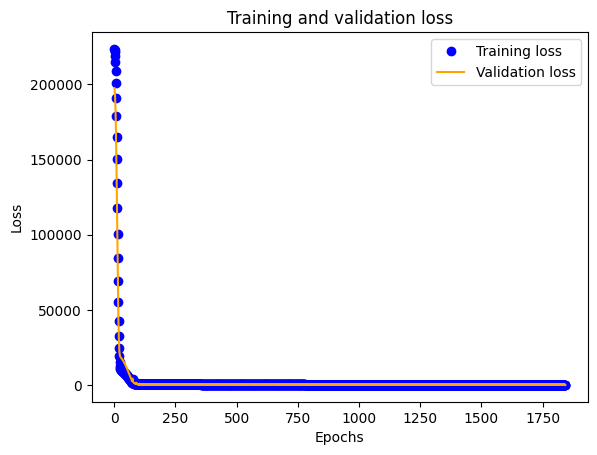

In [ ]:
# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)

# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 23ms/step


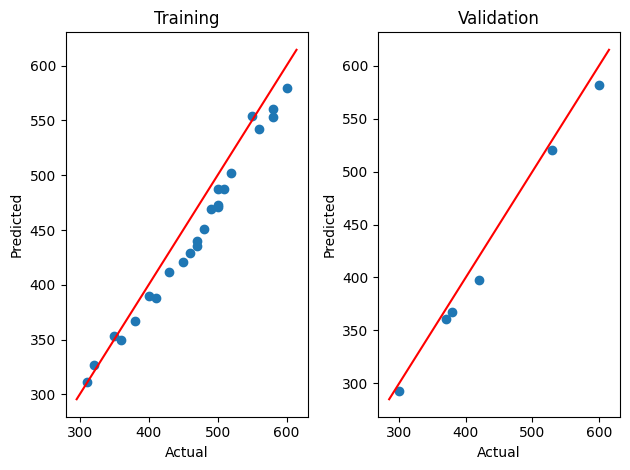

In [ ]:
# scatterplot of actual vs. pred
# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [ ]:
# metrics
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

1/1 [==============================] - 0s 24ms/step
19.161539713541668
13.094548543294271
